<a href="https://colab.research.google.com/github/mamekin05108/signatecup2024summer/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd

In [96]:
df_train = pd.read_csv("/content/drive/MyDrive/Signate/2024summer/cdata3/df_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Signate/2024summer/cdata3/df_test.csv")

In [97]:
df_train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,ProdTaken,MaritalStatus,OwnCar,NumberOfChildren,Agebin,Incomebin
0,0,50.0,Self Enquiry,2,900.0,Large Business,MALE,1.0,4.0,BASIC,...,1,4,Executive,253905.0,1,未婚,なし,0.0,41-50,<300000
1,1,56.0,Company Invited,1,840.0,Salaried,MALE,1.0,4.0,STANDARD,...,1,4,Senior Manager,404475.0,0,離婚,あり,0.0,51-65,<450000
2,2,NaN,Self Enquiry,1,600.0,Large Business,FEMALE,1.0,3.0,BASIC,...,0,4,Executive,278145.0,1,結婚,なし,0.0,NaN,<300000
3,3,37.0,Self Enquiry,2,1080.0,Small Business,FEMALE,1.0,3.0,STANDARD,...,0,5,Senior Manager,326805.0,0,離婚,あり,0.0,31-40,<350000
4,4,48.0,Company Invited,3,1020.0,Small Business,FEMALE,1.0,3.0,BASIC,...,0,4,Executive,258435.0,1,独身,あり,0.0,41-50,<300000


In [110]:
df_train = df_train.drop('id', axis=1)

In [111]:
rows = []
for col in df_train.columns:
    rows.append([col, df_train[col].dtype, df_train[col].isnull().sum(), len(df_train[col].unique())])
pd.DataFrame(rows, columns=["列名", "列の型", "NaNである行の数", "値の種類"])

,列名,列の型,NaNである行の数,値の種類
0,Age,float64,100,46
1,TypeofContact,category,6,3
2,CityTier,category,0,3
3,DurationOfPitch,float64,121,34
4,Occupation,category,0,3
5,Gender,category,0,2
6,NumberOfPersonVisiting,float64,0,4
7,NumberOfFollowups,float64,33,7
8,ProductPitched,category,0,5
9,PreferredPropertyStar,float64,0,3


In [112]:
#get the size of dataframe
print ("Rows     : " , df_train.shape[0])  #get number of rows/observations
print ("Columns  : " , df_train.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", df_train.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", df_train.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(df_train.isna().sum() / df_train.isna().count() * 100, 2).sort_values(ascending=False)) # looking at columns with most Missing Values

Rows     :  3489
Columns  :  21
######################################## 
 Features : 

 ['Age', 'TypeofContact', 'CityTier', 'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'Designation', 'MonthlyIncome', 'ProdTaken', 'MaritalStatus', 'OwnCar', 'NumberOfChildren', 'Agebin', 'Incomebin']
######################################## 
Missing values :

 DurationOfPitch           121
Age                       100
Agebin                    100
MonthlyIncome              56
Incomebin                  56
NumberOfChildren           37
NumberOfFollowups          33
NumberOfTrips              22
TypeofContact               6
Gender                      0
NumberOfPersonVisiting      0
ProductPitched              0
PreferredPropertyStar       0
Passport                    0
PitchSatisfactionScore      0
Designation                 0
Occupation                  0


In [113]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3389.0,38.889938,9.985526,10.0,31.0,38.0,47.0,61.0
DurationOfPitch,3368.0,860.682898,417.261793,240.0,540.0,780.0,960.0,2160.0
NumberOfPersonVisiting,3489.0,2.394669,0.726612,1.0,2.0,2.0,3.0,4.0
NumberOfFollowups,3456.0,3.668981,0.889123,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,3489.0,3.441101,0.599633,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,3467.0,3.194693,1.732849,1.0,2.0,3.0,5.0,8.0
PitchSatisfactionScore,3489.0,2.513901,1.115412,1.0,2.0,2.0,3.0,5.0
MonthlyIncome,3433.0,355671.369065,75173.253245,200000.0,300000.0,343140.0,400000.0,600000.0
NumberOfChildren,3452.0,0.995655,0.780250,0.0,0.0,1.0,2.0,3.0


-=====

In [114]:
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]

In [115]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(df_train[i].value_counts())
    print('*'*50)

Unique values in Designation are :
Executive         1150
Manager           1055
Senior Manager     854
AVP                311
VP                 119
Name: Designation, dtype: int64
**************************************************
Unique values in ProdTaken are :
0    2992
1     497
Name: ProdTaken, dtype: int64
**************************************************
Unique values in OwnCar are :
なし    1785
あり    1704
Name: OwnCar, dtype: int64
**************************************************
Unique values in Passport are :
0    3131
1     358
Name: Passport, dtype: int64
**************************************************
Unique values in CityTier are :
2    1596
1    1475
3     418
Name: CityTier, dtype: int64
**************************************************
Unique values in MaritalStatus are :
結婚    1384
離婚     878
独身     646
未婚     581
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in ProductPitched are :
BASIC          1157
DELUX

In [116]:
df_train[cat_cols] = df_train[cat_cols].astype('category')

In [117]:
df_train.describe(include=['category']).T

,count,unique,top,freq
TypeofContact,3483,2,Self Enquiry,2194
CityTier,3489,3,2,1596
Occupation,3489,3,Small Business,1727
Gender,3489,2,MALE,2064
ProductPitched,3489,5,BASIC,1157
Passport,3489,2,0,3131
Designation,3489,5,Executive,1150
ProdTaken,3489,2,0,2992
MaritalStatus,3489,4,結婚,1384
OwnCar,3489,2,なし,1785


In [118]:
def dist_box(data):
    # 関数は連続変数の単変量分析のためのグラフをプロットします。
    # データの広がり、集中傾向、分散、および外れ値を確認するためのものです。

    Name = data.name.upper()
    fig, (ax_box, ax_dis) = plt.subplots(nrows=2, sharex=True,
                                         gridspec_kw={"height_ratios": (.25, .75)},
                                         figsize=(8, 5))

    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]

    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight='bold')

    # Boxplot
    sns.boxplot(x=data, showmeans=True, orient='h', color="teal", ax=ax_box)
    ax_box.set(xlabel='')

    # 背景を白く設定
    sns.despine(top=True, right=True, left=True)

    # Histogram (代わりに histplot を使用)
    sns.histplot(data, kde=False, color='purple', ax=ax_dis)

    # 平均、中央値、最頻値の線を追加
    ax_dis.axvline(mean, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
    ax_dis.axvline(median, color='g', linestyle='-', linewidth=2, label=f'Median: {median:.2f}')
    ax_dis.axvline(mode, color='y', linestyle='-', linewidth=2, label=f'Mode: {mode:.2f}')

    # 凡例を追加
    ax_dis.legend()

    plt.show()

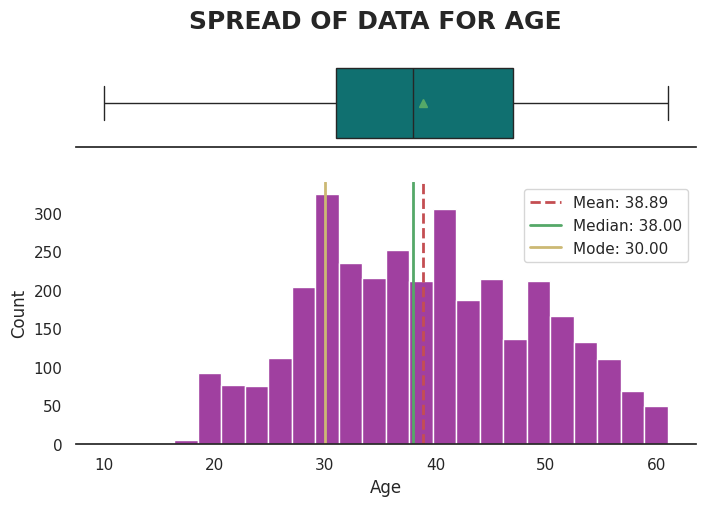

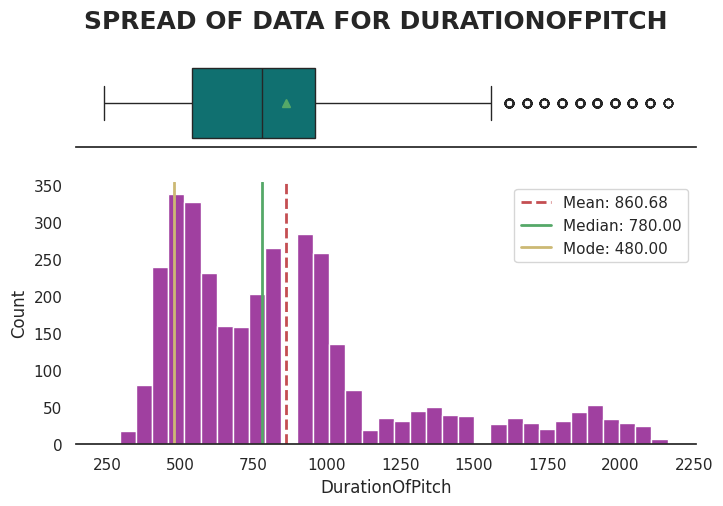

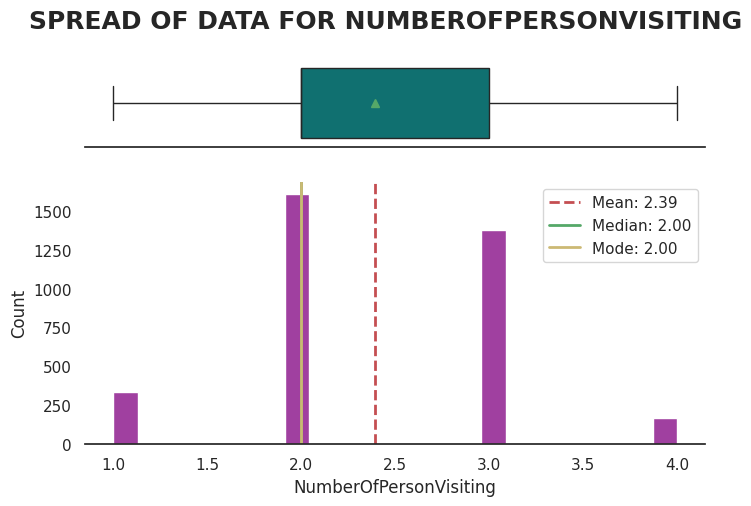

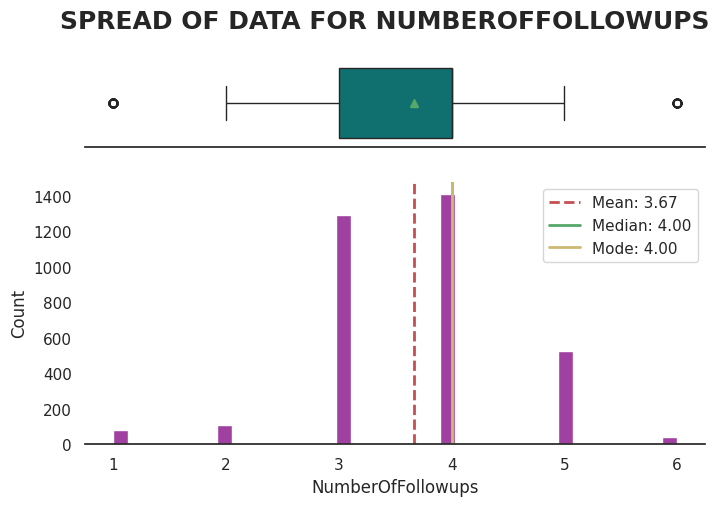

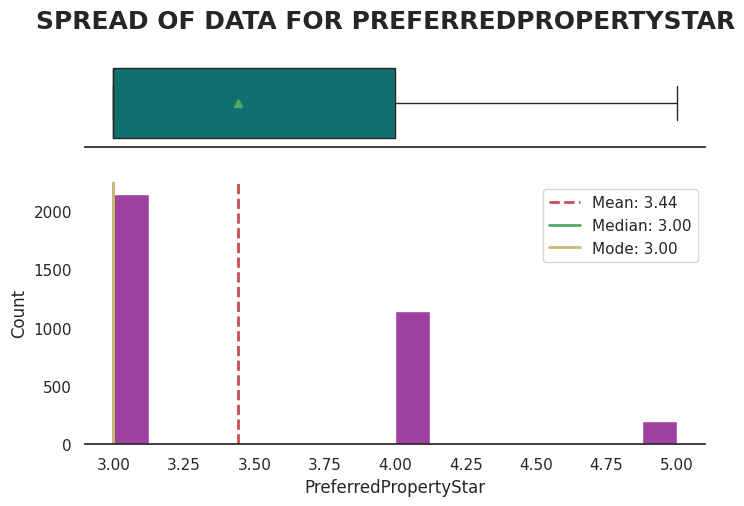

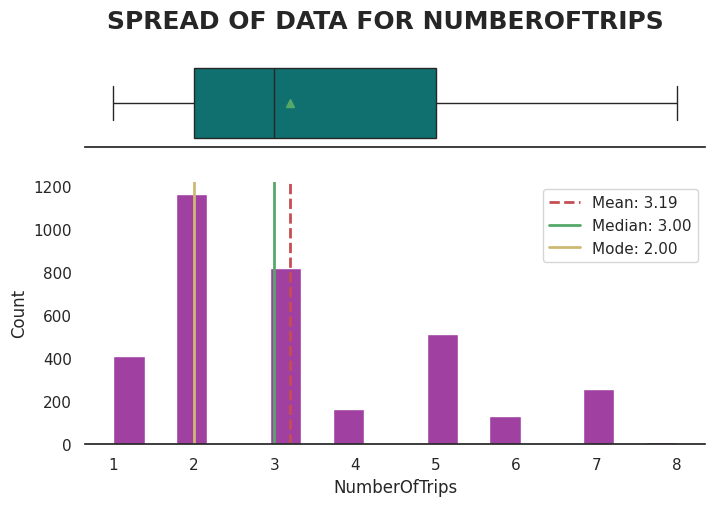

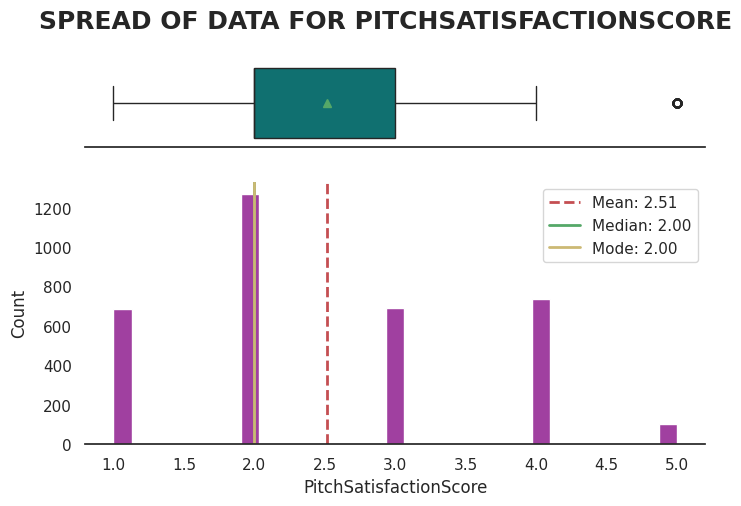

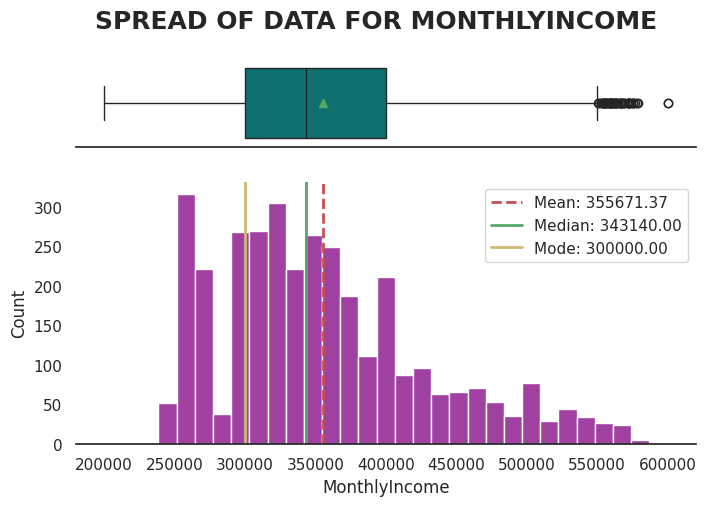

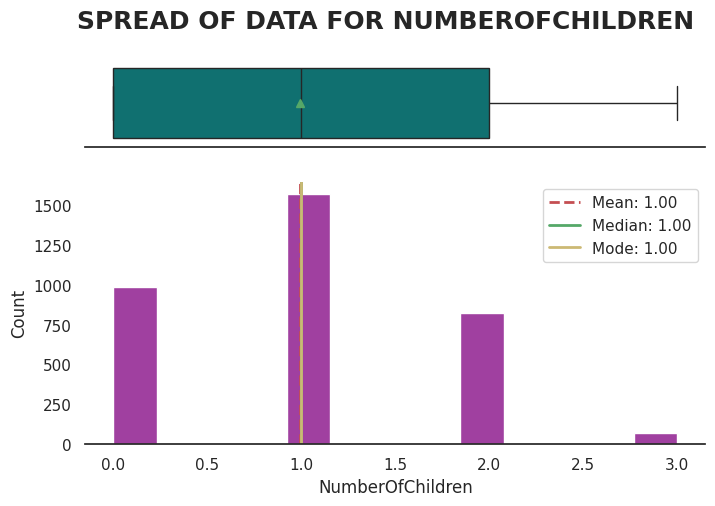

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#select all quantitative columns for checking the spread
list_col=  df_train.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df_train[list_col[i]])

外れ値候補
- DurationOfPitch_Cleaned
- MonthlyIncome_Cleaned

<ipython-input-122-083350fe3d48>:24: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from current font.
  plt.tight_layout()
<ipython-input-122-083350fe3d48>:24: UserWarning: Glyph 23130 (\N{CJK UNIFIED IDEOGRAPH-5A5A}) missing from current font.
  plt.tight_layout()
<ipython-input-122-083350fe3d48>:24: UserWarning: Glyph 29420 (\N{CJK UNIFIED IDEOGRAPH-72EC}) missing from current font.
  plt.tight_layout()
<ipython-input-122-083350fe3d48>:24: UserWarning: Glyph 36523 (\N{CJK UNIFIED IDEOGRAPH-8EAB}) missing from current font.
  plt.tight_layout()
<ipython-input-122-083350fe3d48>:24: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  plt.tight_layout()
<ipython-input-122-083350fe3d48>:24: UserWarning: Glyph 38626 (\N{CJK UNIFIED IDEOGRAPH-96E2}) missing from current font.
  plt.tight_layout()
<ipython-input-122-083350fe3d48>:24: UserWarning: Glyph 12354 (\N{HIRAGANA LETTER A}) missing from current font.
  plt.tight_layout()
<ipython

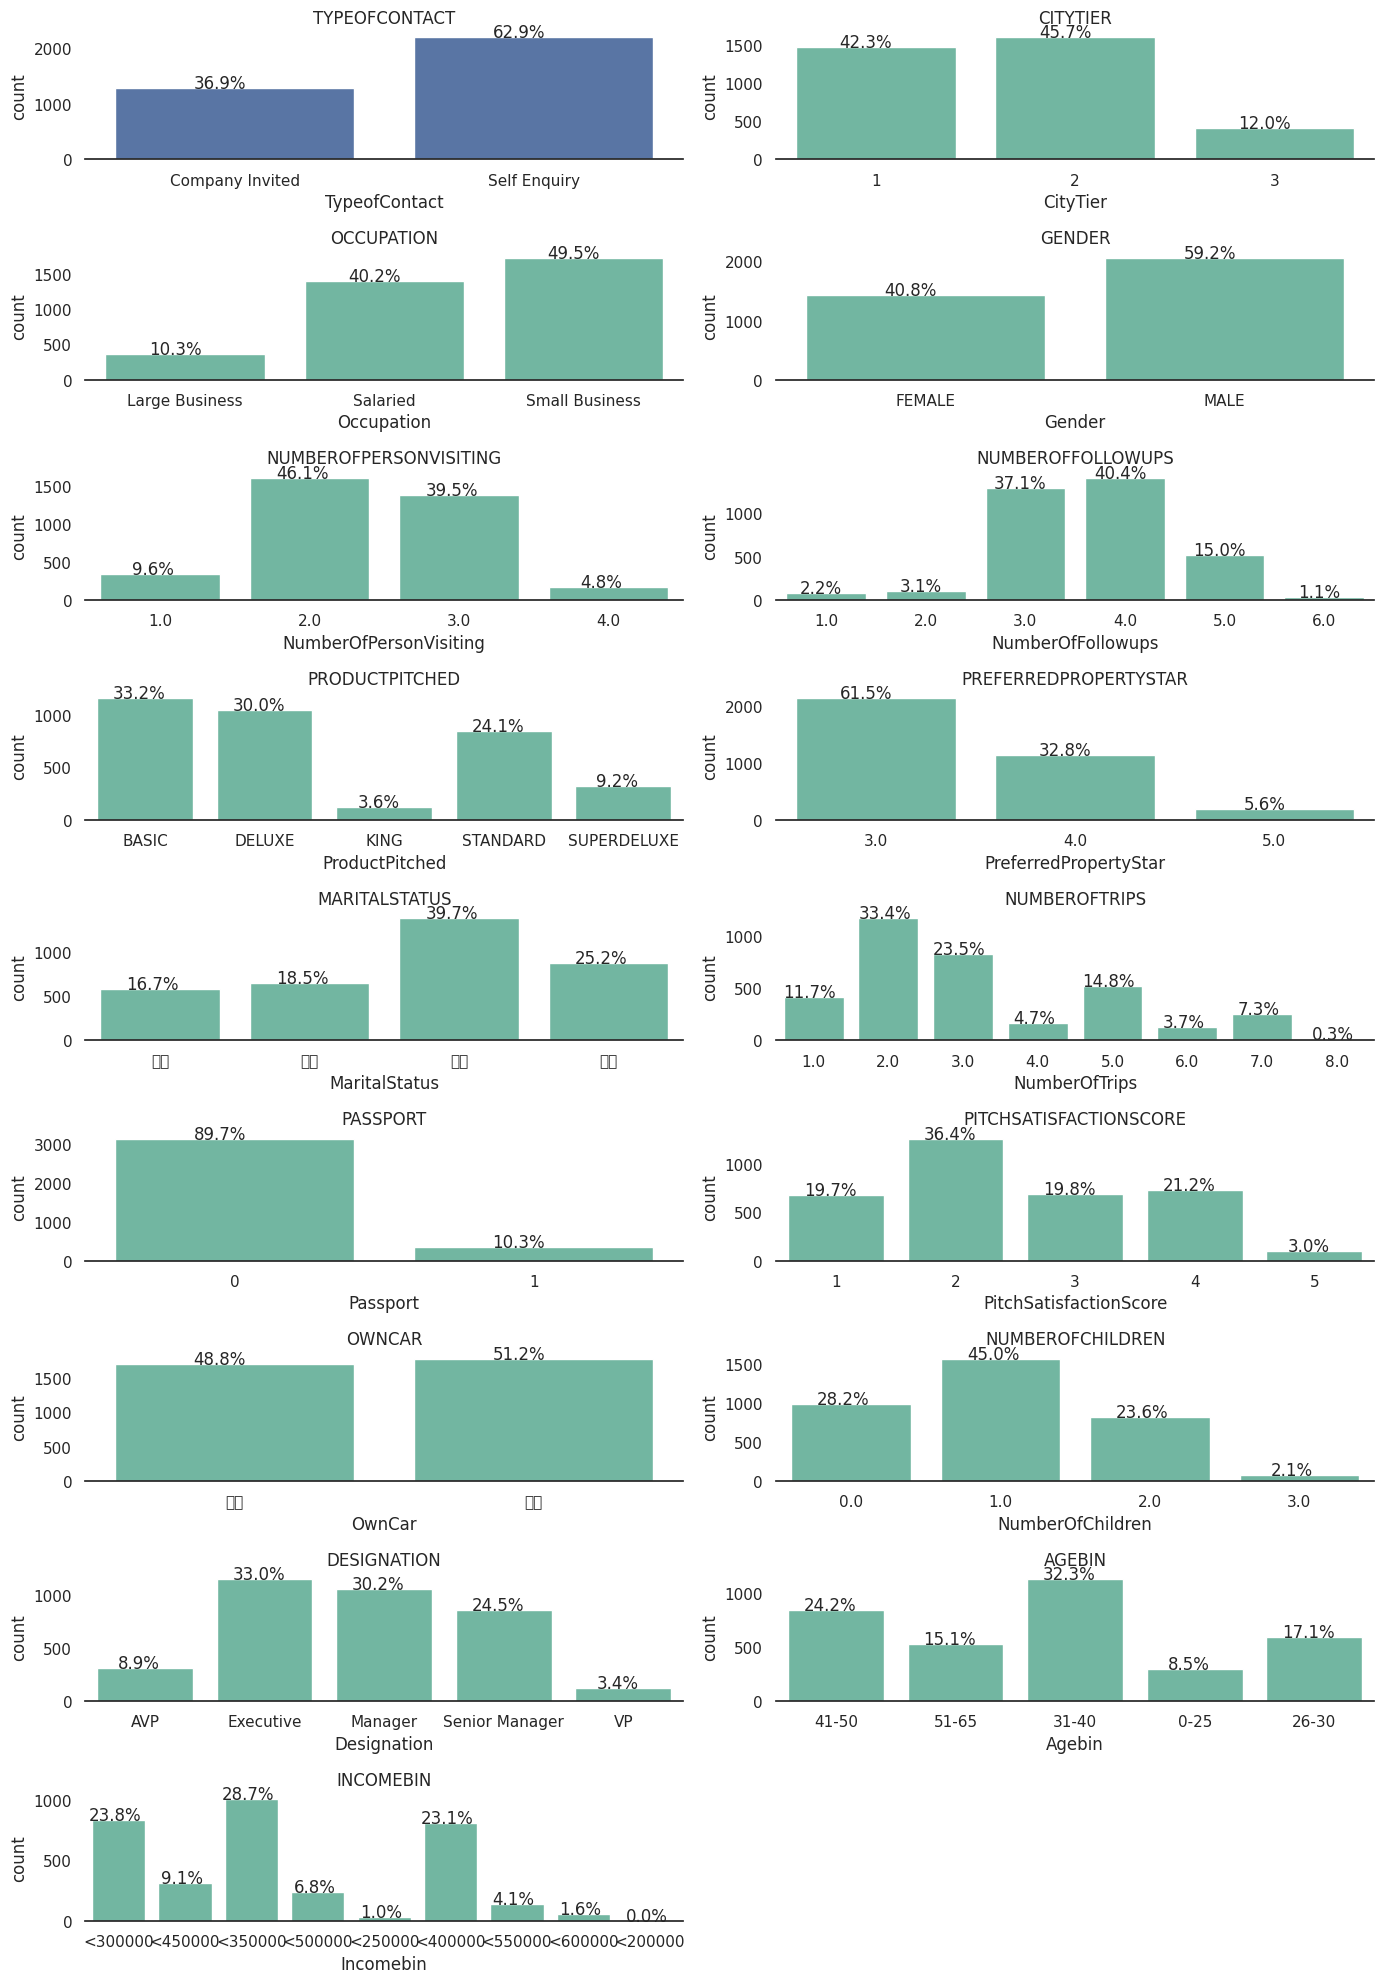

In [122]:
# Making a list of all categorical variables

plt.figure(figsize=(14,20))

sns.set_theme(style="white")
cols=['TypeofContact', 'CityTier', 'Occupation', 'Gender',
        'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
        'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips',
        'Passport', 'PitchSatisfactionScore',
        'OwnCar', 'NumberOfChildren',
        'Designation','Agebin','Incomebin']
for i, variable in enumerate(cols):
                     plt.subplot(9,2,i+1)
                     order = df_train[variable].value_counts(ascending=False).index
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df_train[variable], data=df_train )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_train[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(cols[i].upper())


<ipython-input-123-76976b02f1f1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True)


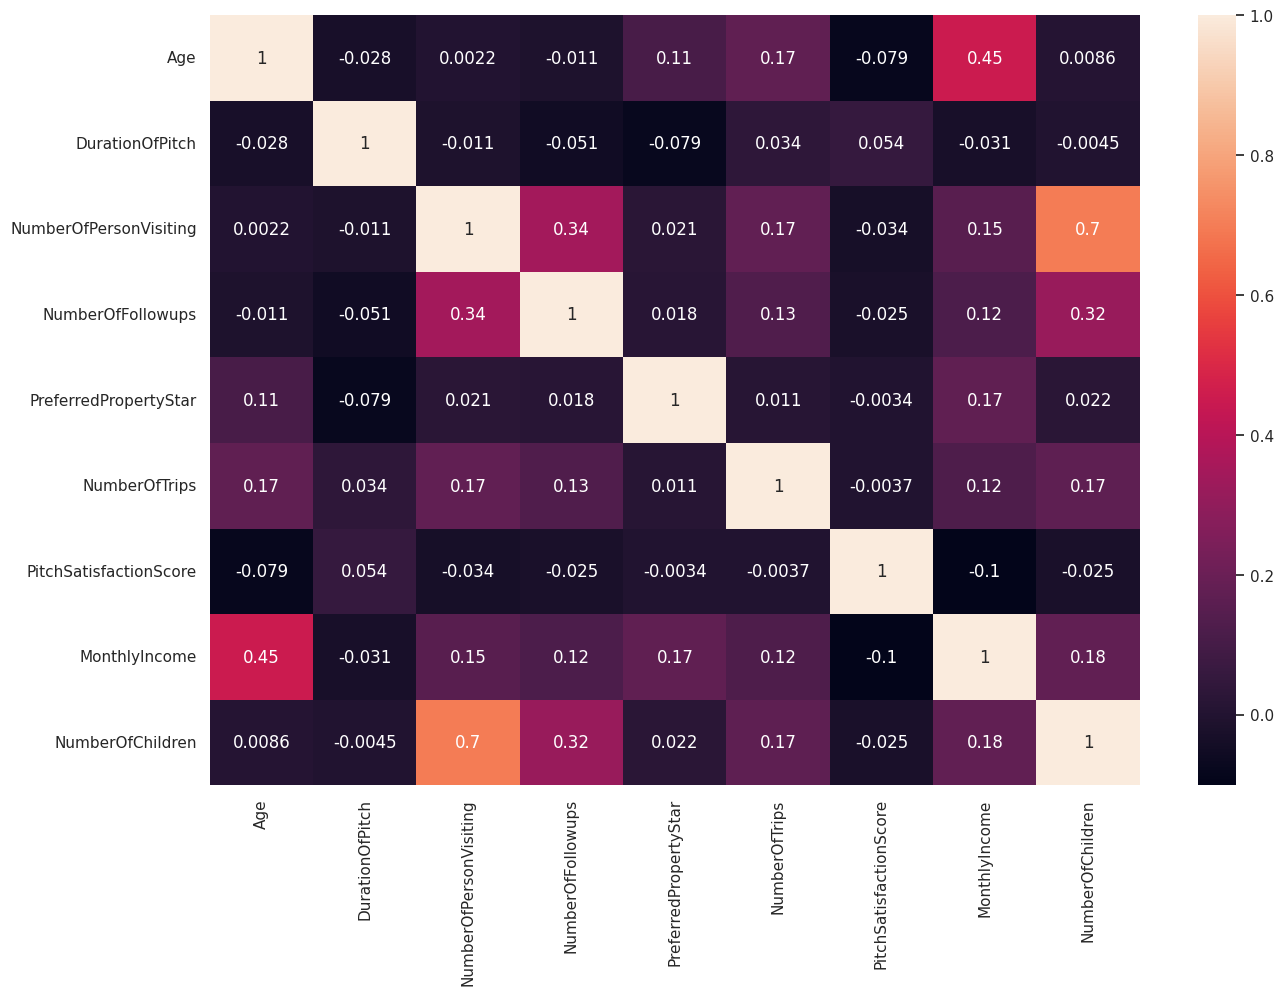

In [123]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

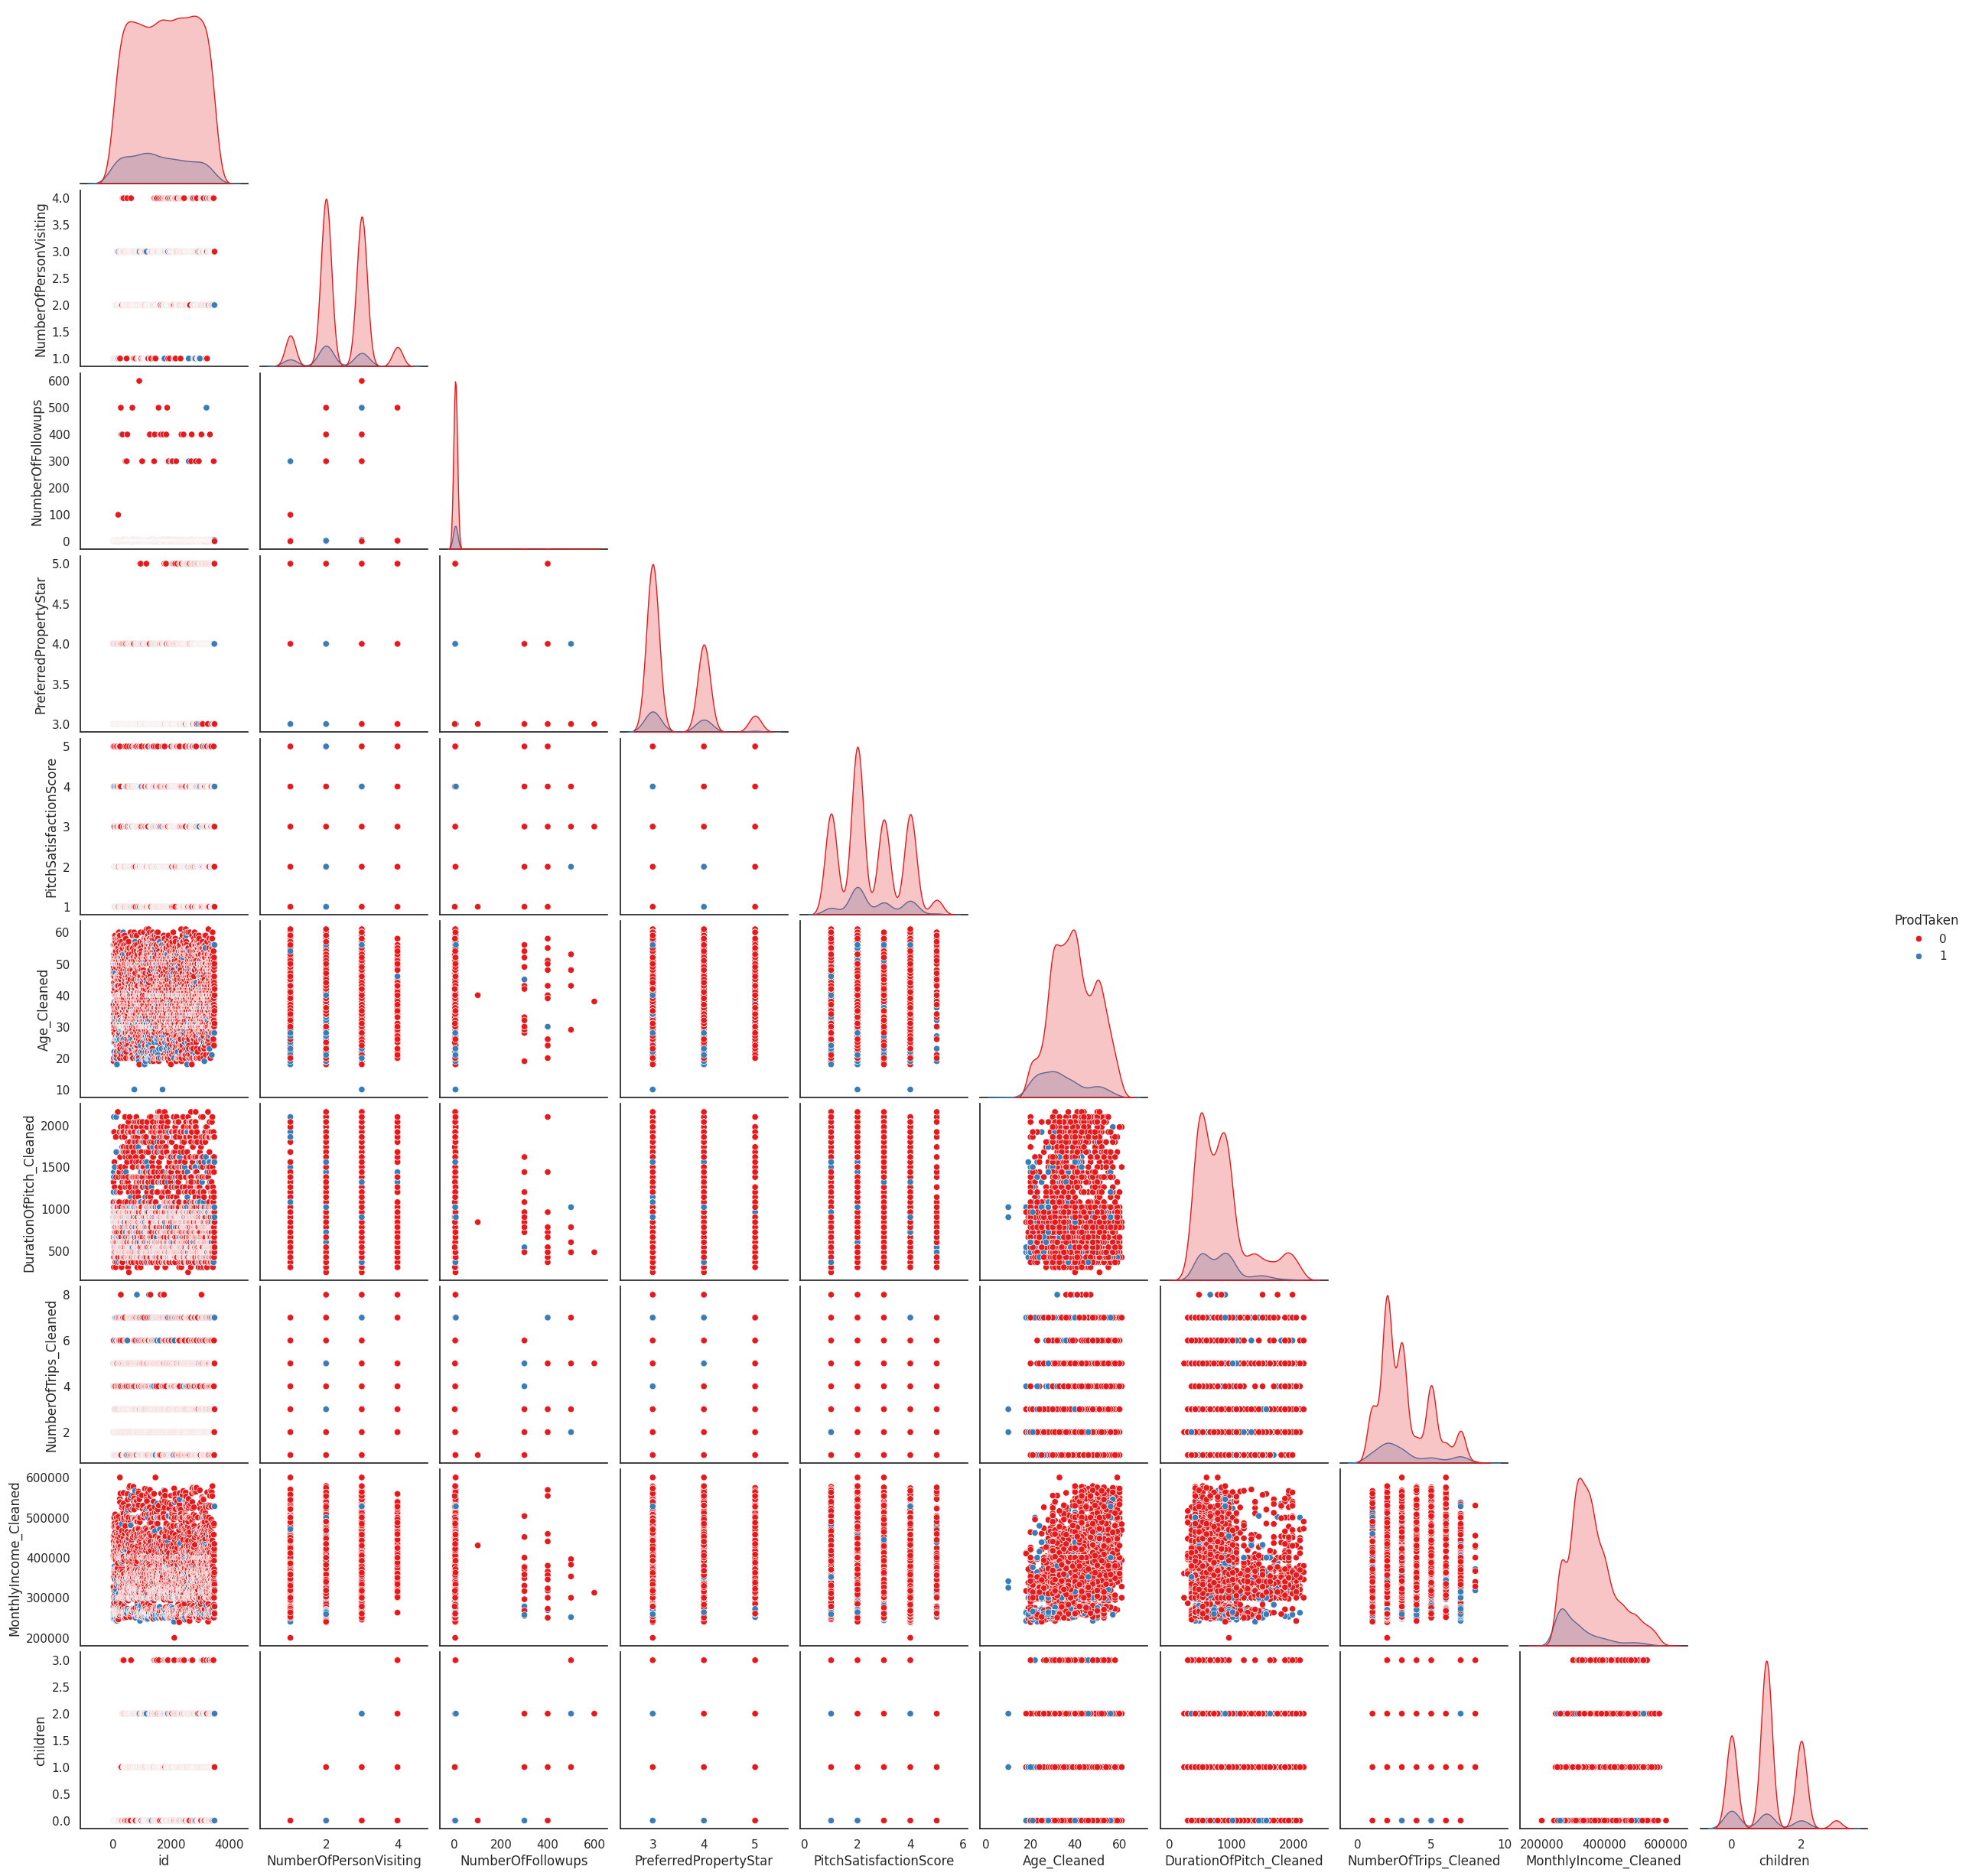

In [91]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(df_train, hue="ProdTaken",corner=True)
plt.show()

In [94]:
### Function to plot distributions and Boxplots of customers
def plot(x, target='ProdTaken'):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Distribution of x for customers who did not take the product
    axs[0, 0].set_title(f'Distribution of {x}\n for customers who did not take the product', fontsize=12, fontweight='bold')
    sns.histplot(df_train[df_train[target] == 0][x], kde=True, ax=axs[0, 0], color='teal')

    # Distribution of x for customers who took the product
    axs[0, 1].set_title(f'Distribution of {x}\n for customers who took the product', fontsize=12, fontweight='bold')
    sns.histplot(df_train[df_train[target] == 1][x], kde=True, ax=axs[0, 1], color='orange')

    # Boxplot of x with respect to product taken
    axs[1, 0].set_title(f'Boxplot of {x} w.r.t Product Taken', fontsize=12, fontweight='bold')
    sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 0], palette='gist_rainbow', showmeans=True)

    # Line to separate the plots
    line = plt.Line2D((.1, .9), (.5, .5), color='grey', linewidth=1.5, linestyle='--')
    fig.add_artist(line)

    # Boxplot of x with respect to product taken (without outliers)
    axs[1, 1].set_title(f'Boxplot of {x} w.r.t Product Taken - Without outliers', fontsize=12, fontweight='bold')
    sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 1], showfliers=False, palette='gist_rainbow', showmeans=True)

    # Remove side lines from graphs
    sns.despine(top=True, right=True, left=True)

    plt.tight_layout(pad=4)
    plt.show()

<ipython-input-94-7e4afa9e95bd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 0], palette='gist_rainbow', showmeans=True)
<ipython-input-94-7e4afa9e95bd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 1], showfliers=False, palette='gist_rainbow', showmeans=True)


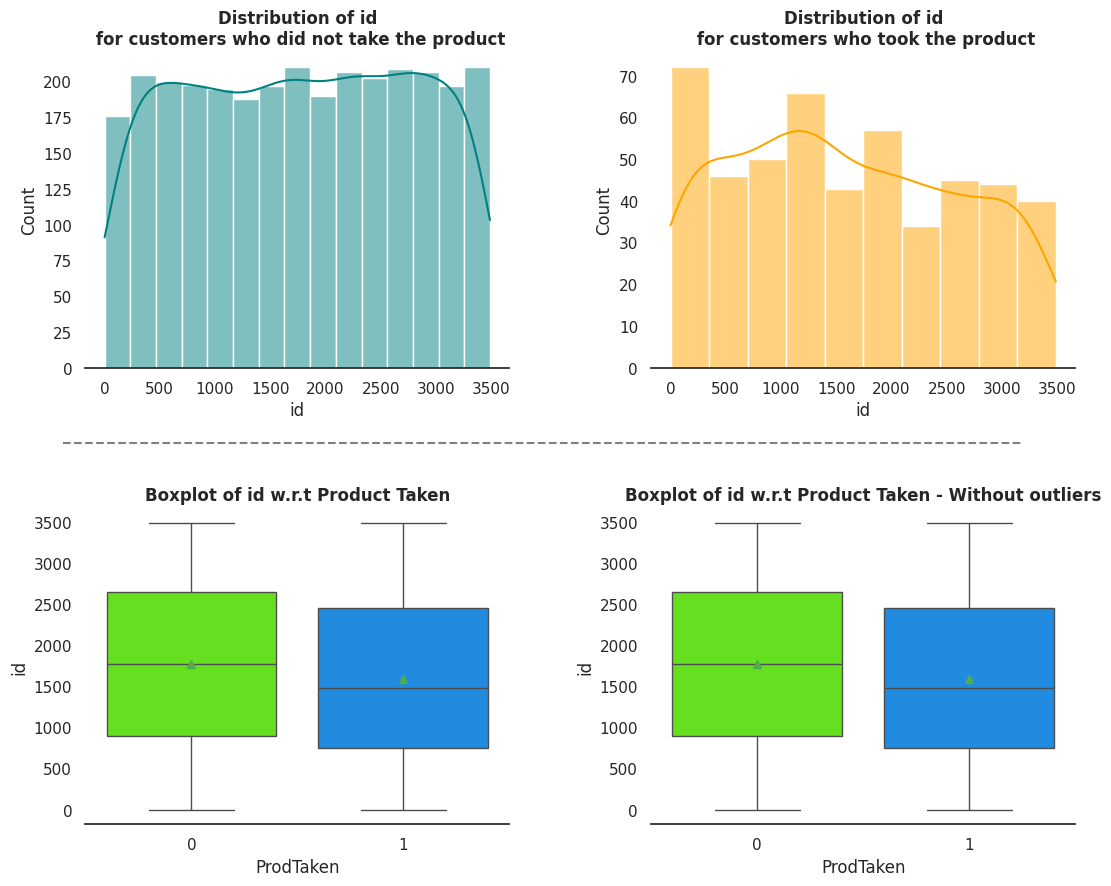

<ipython-input-94-7e4afa9e95bd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 0], palette='gist_rainbow', showmeans=True)
<ipython-input-94-7e4afa9e95bd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 1], showfliers=False, palette='gist_rainbow', showmeans=True)


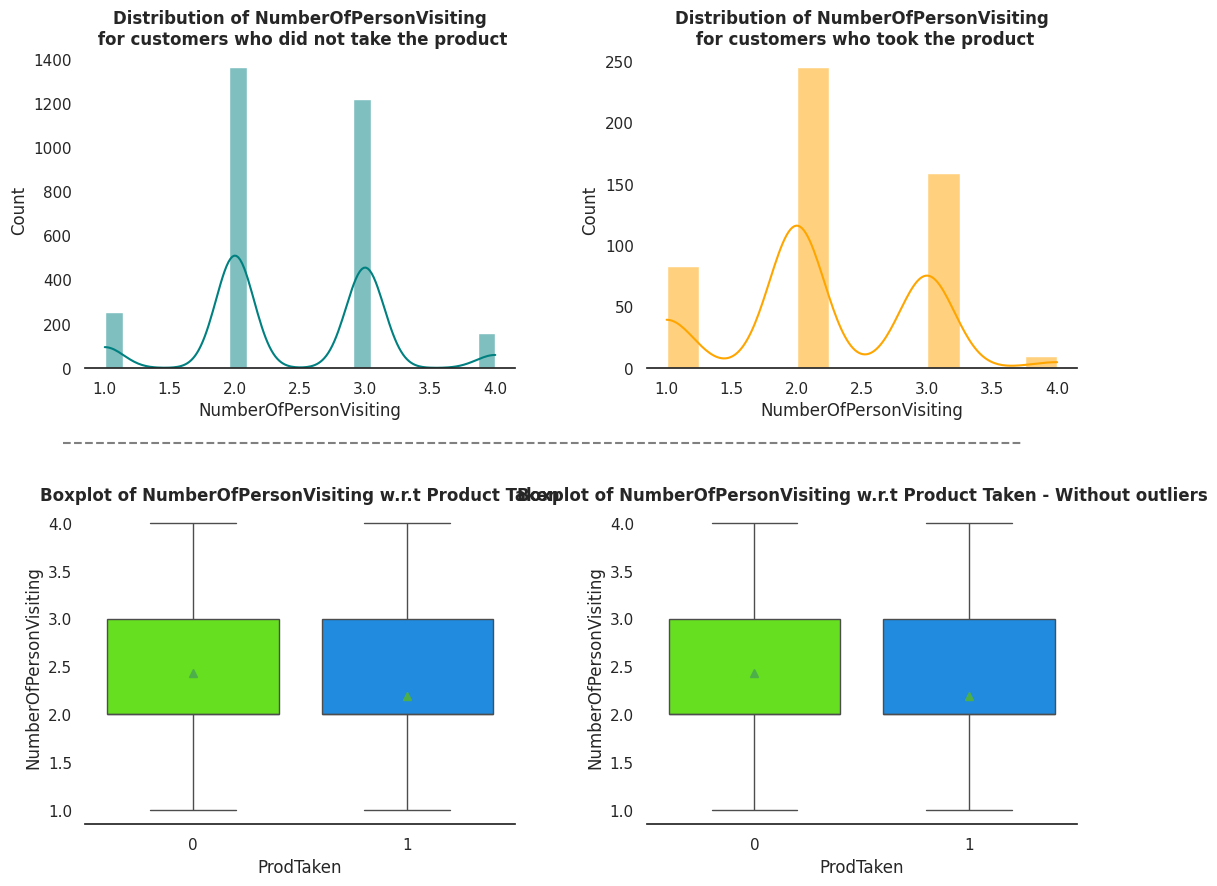

<ipython-input-94-7e4afa9e95bd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 0], palette='gist_rainbow', showmeans=True)
<ipython-input-94-7e4afa9e95bd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 1], showfliers=False, palette='gist_rainbow', showmeans=True)


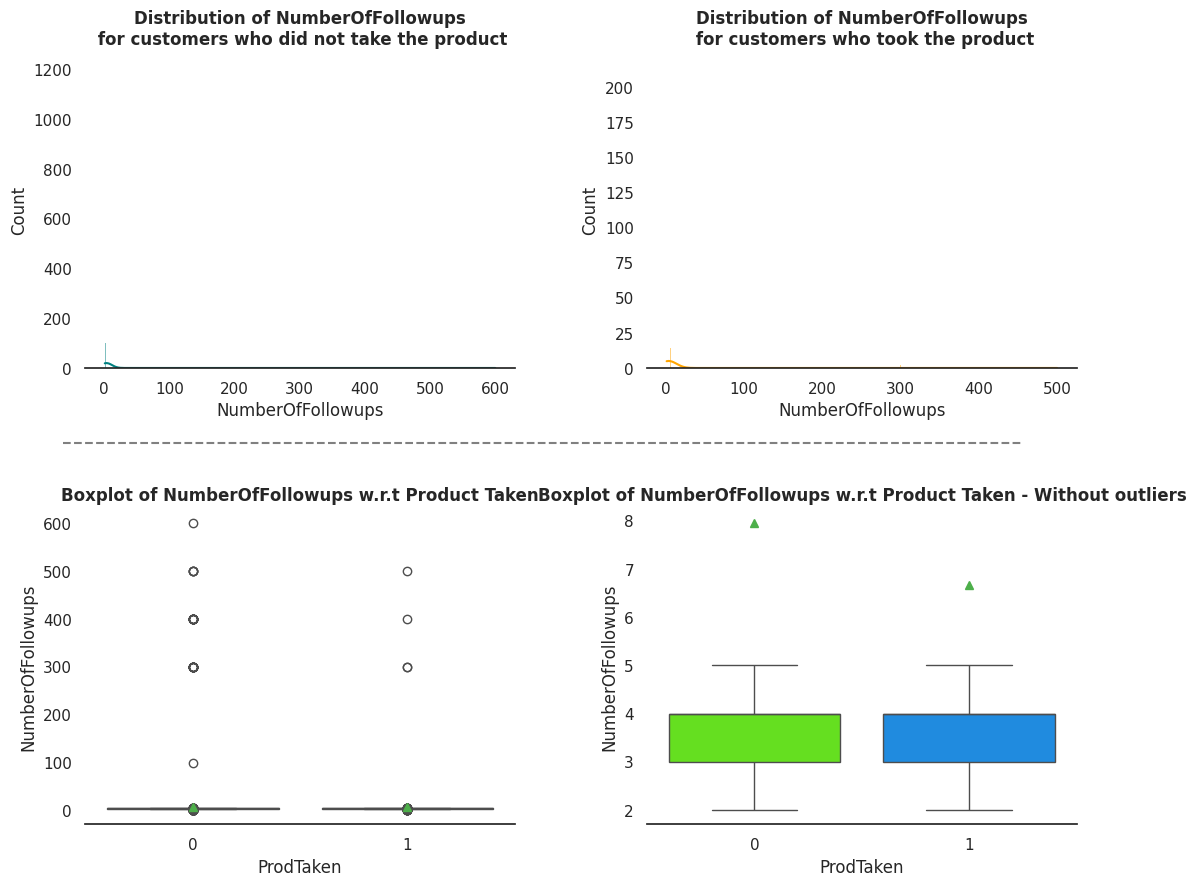

<ipython-input-94-7e4afa9e95bd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 0], palette='gist_rainbow', showmeans=True)
<ipython-input-94-7e4afa9e95bd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 1], showfliers=False, palette='gist_rainbow', showmeans=True)


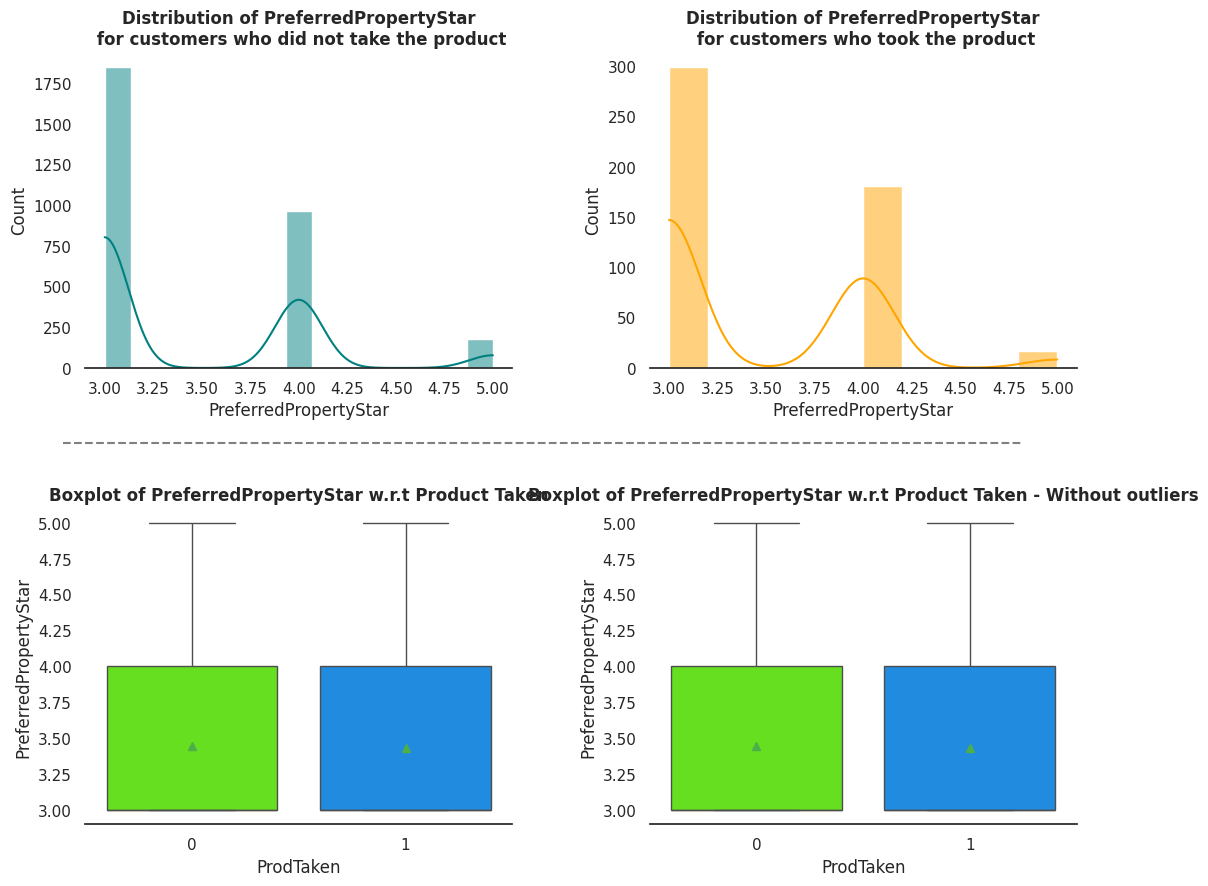

<ipython-input-94-7e4afa9e95bd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 0], palette='gist_rainbow', showmeans=True)
<ipython-input-94-7e4afa9e95bd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 1], showfliers=False, palette='gist_rainbow', showmeans=True)


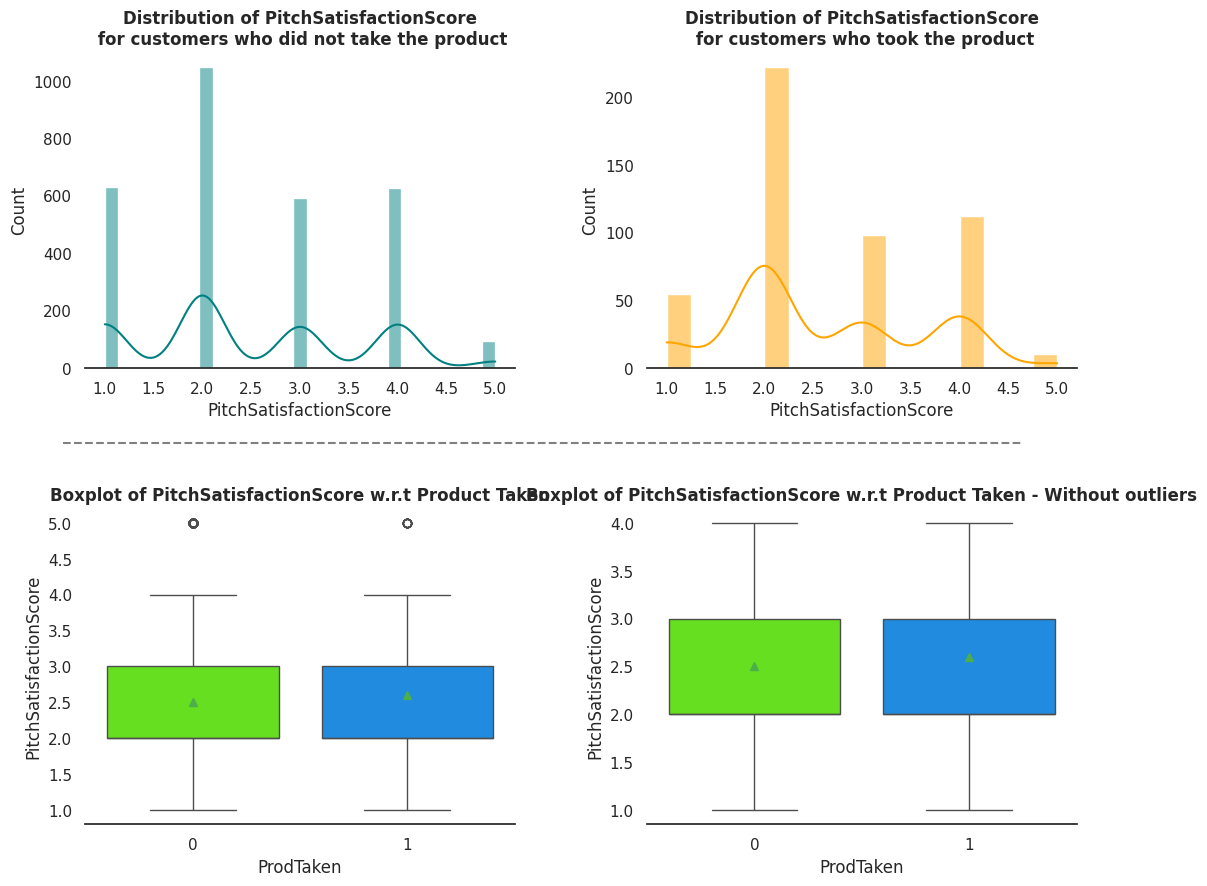

<ipython-input-94-7e4afa9e95bd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 0], palette='gist_rainbow', showmeans=True)
<ipython-input-94-7e4afa9e95bd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 1], showfliers=False, palette='gist_rainbow', showmeans=True)


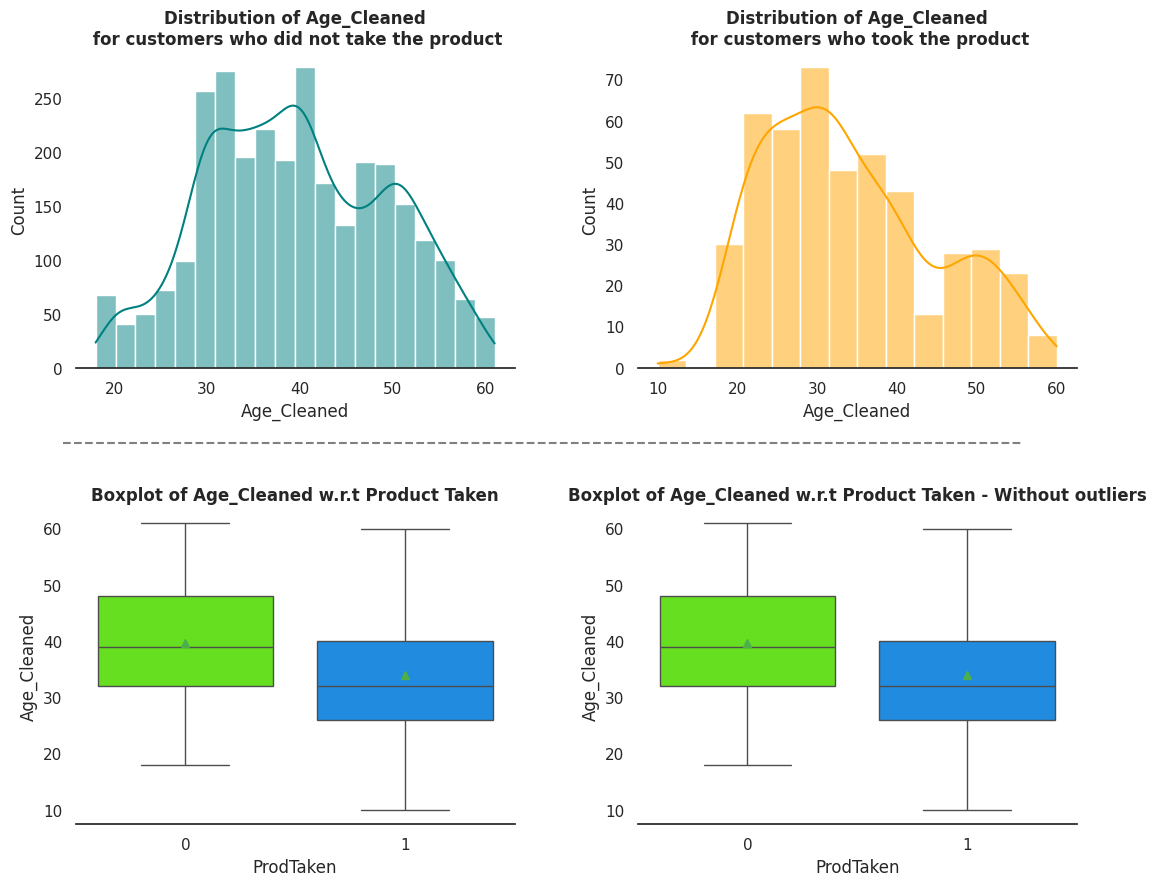

<ipython-input-94-7e4afa9e95bd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 0], palette='gist_rainbow', showmeans=True)
<ipython-input-94-7e4afa9e95bd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 1], showfliers=False, palette='gist_rainbow', showmeans=True)


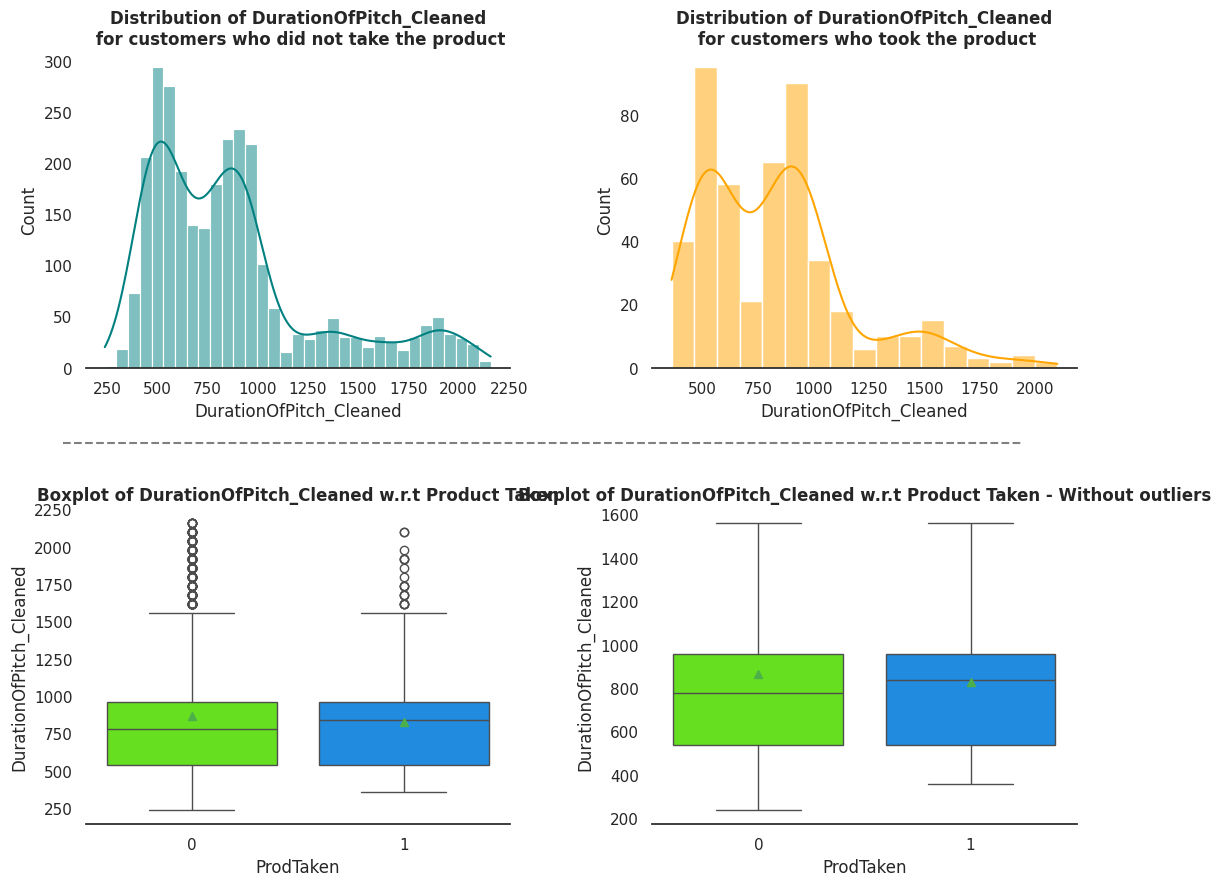

<ipython-input-94-7e4afa9e95bd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 0], palette='gist_rainbow', showmeans=True)
<ipython-input-94-7e4afa9e95bd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 1], showfliers=False, palette='gist_rainbow', showmeans=True)


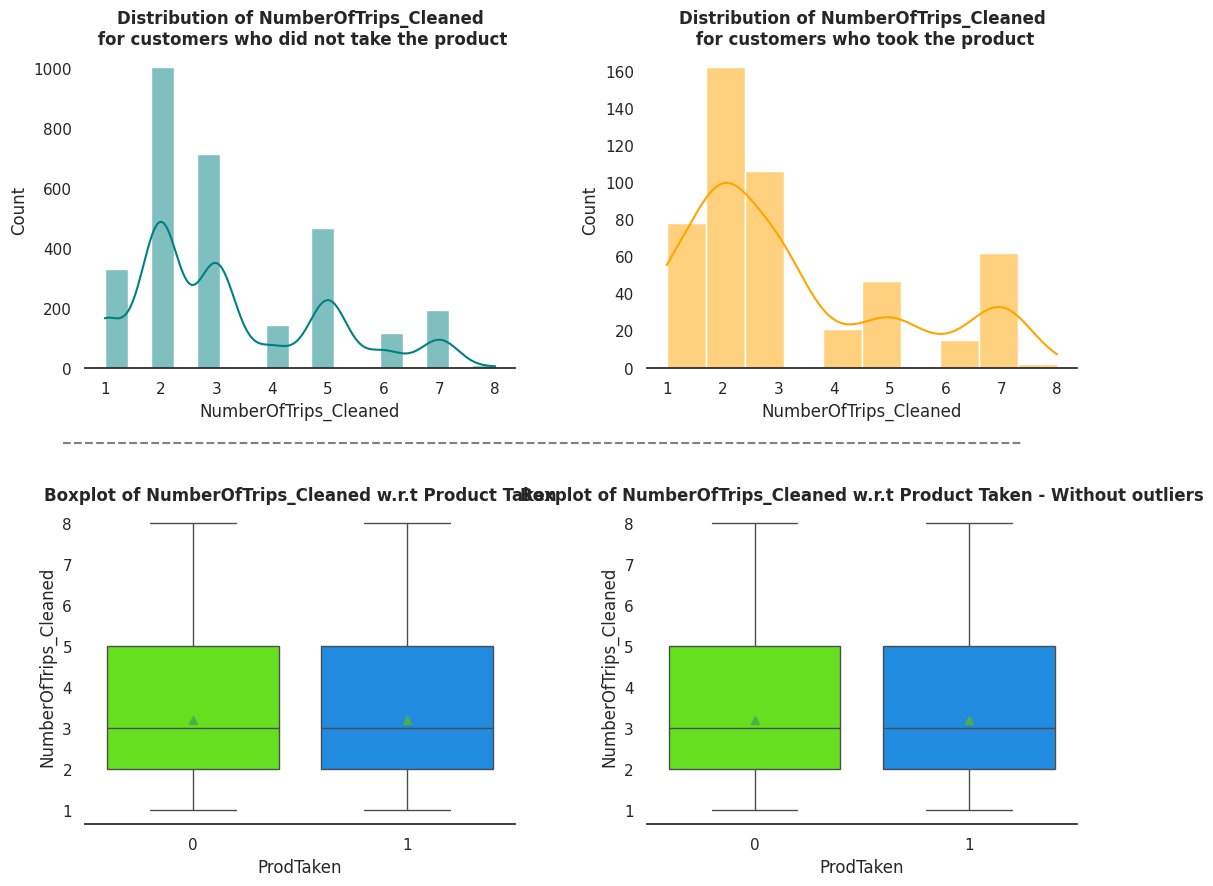

<ipython-input-94-7e4afa9e95bd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 0], palette='gist_rainbow', showmeans=True)
<ipython-input-94-7e4afa9e95bd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 1], showfliers=False, palette='gist_rainbow', showmeans=True)


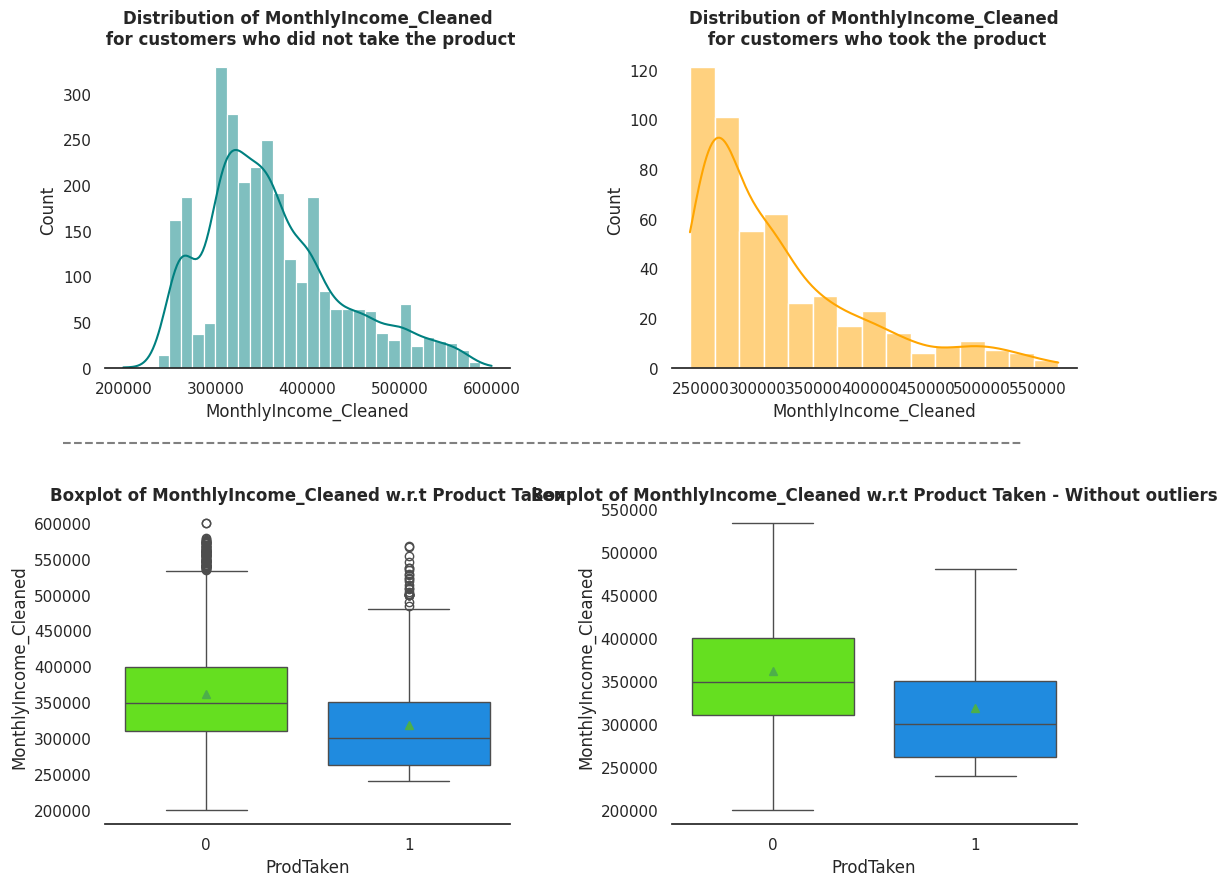

<ipython-input-94-7e4afa9e95bd>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 0], palette='gist_rainbow', showmeans=True)
<ipython-input-94-7e4afa9e95bd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[target], y=df_train[x], ax=axs[1, 1], showfliers=False, palette='gist_rainbow', showmeans=True)


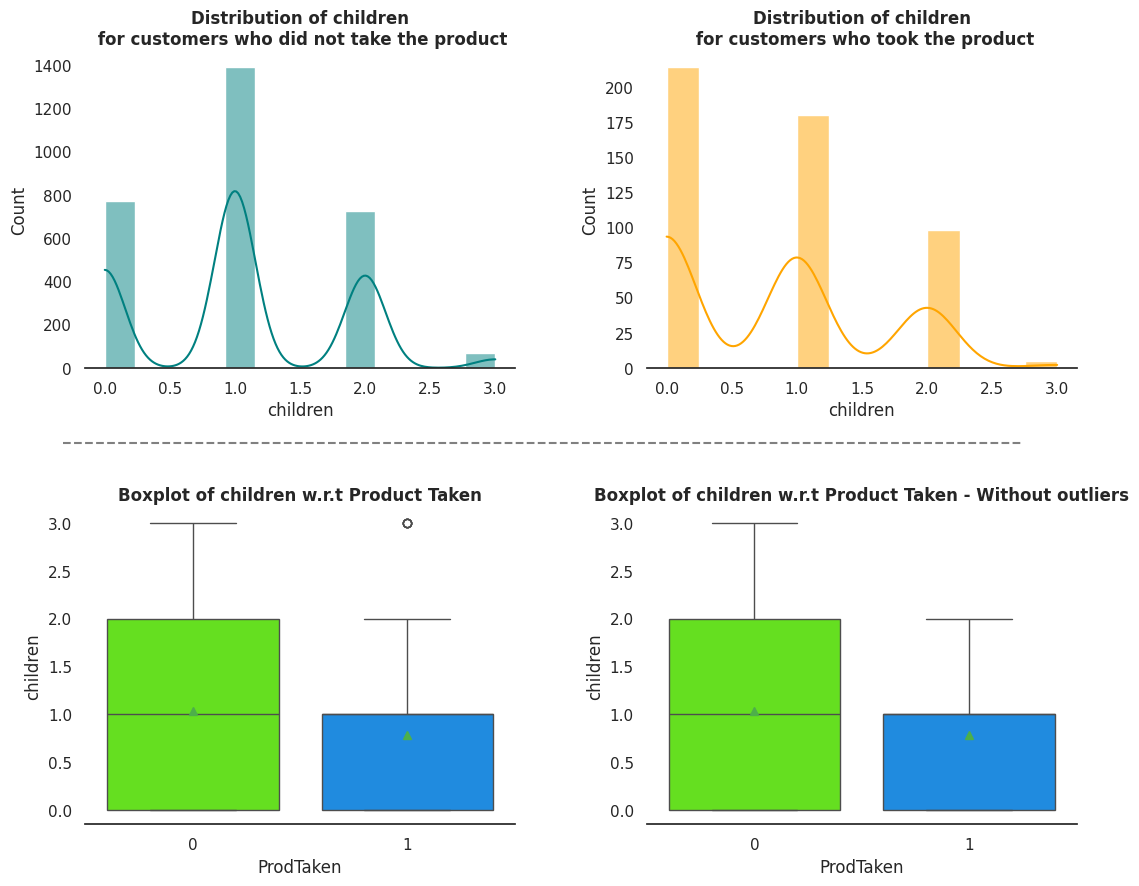

In [95]:
list_col=df_train.select_dtypes(include='number').columns.to_list()
#print(list_col)
#plt.figure(figsize=(14,23))
for j in range(len(list_col)):
   plot(list_col[j])